# NLTK Complete Guide - Section 2: Text Processing Fundamentals

This notebook covers:
- Working with Text
- NLTK Text Object
- Loading Sample Texts
- Text Statistics

In [1]:
import nltk
from nltk.text import Text
from nltk.tokenize import word_tokenize, sent_tokenize

## 2.1 Working with Text

Basic string operations on text data.

In [2]:
text = """Natural Language Processing (NLP) is a field of artificial intelligence 
that gives computers the ability to understand text and spoken words."""

print("Original text:")
print(text)
print(f"\nLength: {len(text)} characters")
print(f"Word count (simple): {len(text.split())}")

Original text:
Natural Language Processing (NLP) is a field of artificial intelligence 
that gives computers the ability to understand text and spoken words.

Length: 142 characters
Word count (simple): 21


In [3]:
# Case transformations
print("Uppercase:")
print(text.upper())

print("\nLowercase:")
print(text.lower())

Uppercase:
NATURAL LANGUAGE PROCESSING (NLP) IS A FIELD OF ARTIFICIAL INTELLIGENCE 
THAT GIVES COMPUTERS THE ABILITY TO UNDERSTAND TEXT AND SPOKEN WORDS.

Lowercase:
natural language processing (nlp) is a field of artificial intelligence 
that gives computers the ability to understand text and spoken words.


## 2.2 NLTK Text Object

The `Text` class provides useful methods for text analysis.

In [4]:
# Create NLTK Text object
sample_text = """Natural Language Processing enables computers to understand human language.
Language processing involves many complex tasks. Processing text requires 
understanding grammar and semantics. Computers can now process language effectively.
Natural language understanding is a key challenge in artificial intelligence.
Language models have revolutionized natural language processing."""

tokens = word_tokenize(sample_text)
nltk_text = Text(tokens)

print(f"Total tokens: {len(nltk_text)}")
print(f"Unique tokens: {len(set(nltk_text))}")

Total tokens: 51
Unique tokens: 37


### Concordance
Shows a word in its context (surrounding words).

In [5]:
# Concordance - shows word in context
print("Concordance for 'language':")
nltk_text.concordance("language", width=60, lines=5)

Concordance for 'language':
Displaying 5 of 7 matches:
                  Natural Language Processing enables comput
uters to understand human language . Language processing inv
derstand human language . Language processing involves many 
Computers can now process language effectively . Natural lan
age effectively . Natural language understanding is a key ch


In [6]:
print("Concordance for 'processing':")
nltk_text.concordance("processing", width=60, lines=5)

Concordance for 'processing':
Displaying 4 of 4 matches:
        Natural Language Processing enables computers to und
uman language . Language processing involves many complex ta
ves many complex tasks . Processing text requires understand
ionized natural language processing .


### Word Count

In [7]:
# Count specific words
print(f"'language' appears: {nltk_text.count('language')} times")
print(f"'processing' appears: {nltk_text.count('processing')} times")
print(f"'Natural' appears: {nltk_text.count('Natural')} times")

'language' appears: 4 times
'processing' appears: 2 times
'Natural' appears: 2 times


### Vocabulary

In [8]:
# Get vocabulary with frequencies
vocab = nltk_text.vocab()

print("Top 15 most common words:")
print("-" * 30)
for word, count in vocab.most_common(15):
    print(f"{word:<20} {count}")

Top 15 most common words:
------------------------------
.                    6
language             4
Language             3
Natural              2
Processing           2
processing           2
understanding        2
enables              1
computers            1
to                   1
understand           1
human                1
involves             1
many                 1
complex              1


### Finding Similar Words
Words that appear in similar contexts.

In [18]:
# Create a larger text for better similar word detection
larger_text = """The cat sat on the mat. The dog sat on the rug. 
The cat chased the mouse. The dog chased the cat.
A happy cat is a good cat. A happy dog is a good dog.
The cat sleeps on the bed. The dog sleeps on the floor.
My cat likes fish. My dog likes meat."""

tokens_large = word_tokenize(larger_text.lower())
text_large = Text(tokens_large)

print("Words similar to 'cat':")
text_large.similar("cat")

Words similar to 'cat':
dog


### How `similar()` Works

The `similar()` function finds words that share **the same surrounding context** (words before and after).

**Algorithm:**
1. For each word, record its context: `(word_before, word_after)`
2. Build an index: `context → [words that appear in this context]`
3. For a query word, find all its contexts, then find other words sharing those contexts

**Limitations:**
- Needs **repeated patterns** - words must appear multiple times in similar positions
- **Small text** = poor results (not enough context examples)
- **Unique contexts** = no similar words found
- **Sentence boundaries** break context chains

In [13]:
# ============================================
# GOOD CASE: Repeated patterns, shared contexts
# ============================================
good_text = """
The cat sat on the mat. The dog sat on the mat. The rabbit sat on the mat.
The cat ran to the park. The dog ran to the park. The rabbit ran to the park.
The cat ate the food. The dog ate the food. The rabbit ate the food.
The cat slept on the bed. The dog slept on the bed. The rabbit slept on the bed.
A happy cat is cute. A happy dog is cute. A happy rabbit is cute.
My cat loves toys. My dog loves toys. My rabbit loves toys.
"""

good_tokens = word_tokenize(good_text.lower())
good_nltk = Text(good_tokens)

print("=" * 50)
print("GOOD CASE: Many repeated patterns")
print("=" * 50)
print(f"Tokens: {len(good_tokens)}, Unique: {len(set(good_tokens))}")
print("\nWords similar to 'cat':")
good_nltk.similar("cat")
print("\nWords similar to 'dog':")
good_nltk.similar("dog")

GOOD CASE: Many repeated patterns
Tokens: 114, Unique: 22

Words similar to 'cat':
dog rabbit

Words similar to 'dog':
cat rabbit


In [19]:
# ============================================
# BAD CASE 1: Too small corpus
# ============================================
small_text = """The cat sat on the mat."""

small_tokens = word_tokenize(small_text.lower())
small_nltk = Text(small_tokens)

print("=" * 50)
print("BAD CASE 1: Corpus too small")
print("=" * 50)
print(f"Tokens: {len(small_tokens)}, Unique: {len(set(small_tokens))}")
print("\nWords similar to 'cat':")
small_nltk.similar("cat")  # Returns nothing - not enough data!

BAD CASE 1: Corpus too small
Tokens: 7, Unique: 6

Words similar to 'cat':



In [20]:
# ============================================
# BAD CASE 2: Unique contexts (no shared patterns)
# ============================================
unique_text = """
The elephant trumpeted loudly in the jungle.
A submarine dove deep into the ocean.
The astronaut floated weightlessly in space.
My computer crashed unexpectedly yesterday morning.
The chef prepared delicious spaghetti for dinner.
"""

unique_tokens = word_tokenize(unique_text.lower())
unique_nltk = Text(unique_tokens)

print("=" * 50)
print("BAD CASE 2: All unique contexts (no patterns)")
print("=" * 50)
print(f"Tokens: {len(unique_tokens)}, Unique: {len(set(unique_tokens))}")
print("\nWords similar to 'elephant':")
unique_nltk.similar("elephant")  # No results - appears in unique context
print("\nWords similar to 'submarine':")
unique_nltk.similar("submarine")  # No results - no shared context

BAD CASE 2: All unique contexts (no patterns)
Tokens: 38, Unique: 29

Words similar to 'elephant':


Words similar to 'submarine':



In [16]:
# ============================================
# BAD CASE 3: Words appear only once
# ============================================
once_text = """
The cat played in the garden. A dog barked at the mailman.
The bird flew over the house. A fish swam in the pond.
The horse galloped across the field. A cow grazed in the meadow.
"""

once_tokens = word_tokenize(once_text.lower())
once_nltk = Text(once_tokens)

print("=" * 50)
print("BAD CASE 3: Each animal appears only once")
print("=" * 50)
print(f"Tokens: {len(once_tokens)}, Unique: {len(set(once_tokens))}")
print("\nWords similar to 'cat':")
once_nltk.similar("cat")  # Poor results - cat only appears once
print("\nWords similar to 'bird':")
once_nltk.similar("bird")  # Poor results

BAD CASE 3: Each animal appears only once
Tokens: 42, Unique: 25

Words similar to 'cat':


Words similar to 'bird':



In [21]:
# ============================================
# Understanding the context index (what similar() uses)
# ============================================
from collections import defaultdict

def show_context_index(text, target_word):
    """Visualize how similar() builds its context index"""
    tokens = word_tokenize(text.lower())
    
    # Build context index (simplified version of what NLTK does)
    word_contexts = defaultdict(set)
    
    for i in range(1, len(tokens) - 1):
        word = tokens[i]
        context = (tokens[i-1], tokens[i+1])  # (word_before, word_after)
        word_contexts[word].add(context)
    
    print(f"Contexts for '{target_word}':")
    if target_word in word_contexts:
        for ctx in word_contexts[target_word]:
            print(f"  '{ctx[0]}' ___ '{ctx[1]}'")
    else:
        print("  (not found)")
    
    # Find words with shared contexts
    target_contexts = word_contexts.get(target_word, set())
    similar_words = []
    
    for word, contexts in word_contexts.items():
        if word != target_word:
            shared = contexts & target_contexts
            if shared:
                similar_words.append((word, len(shared), shared))
    
    print(f"\nWords sharing contexts with '{target_word}':")
    if similar_words:
        for word, count, shared in sorted(similar_words, key=lambda x: -x[1]):
            print(f"  '{word}' shares {count} context(s): {shared}")
    else:
        print("  (none found - this is why similar() returns nothing!)")

# Demonstrate with good case
print("=" * 60)
print("GOOD: Multiple shared contexts")
print("=" * 60)
show_context_index(good_text, "cat")

print("\n" + "=" * 60)
print("BAD: No shared contexts")  
print("=" * 60)
show_context_index(unique_text, "elephant")

GOOD: Multiple shared contexts
Contexts for 'cat':
  'the' ___ 'sat'
  'the' ___ 'slept'
  'the' ___ 'ate'
  'the' ___ 'ran'
  'happy' ___ 'is'
  'my' ___ 'loves'

Words sharing contexts with 'cat':
  'dog' shares 6 context(s): {('the', 'sat'), ('the', 'slept'), ('the', 'ate'), ('the', 'ran'), ('happy', 'is'), ('my', 'loves')}
  'rabbit' shares 6 context(s): {('the', 'sat'), ('the', 'slept'), ('the', 'ate'), ('the', 'ran'), ('happy', 'is'), ('my', 'loves')}

BAD: No shared contexts
Contexts for 'elephant':
  'the' ___ 'trumpeted'

Words sharing contexts with 'elephant':
  (none found - this is why similar() returns nothing!)


### Common Contexts

In [22]:
print("Common contexts for 'cat' and 'dog':")
text_large.common_contexts(["cat", "dog"])

Common contexts for 'cat' and 'dog':
the_sat the_chased happy_is the_sleeps my_likes


### Dispersion Plot
Visualize where words appear throughout the text.

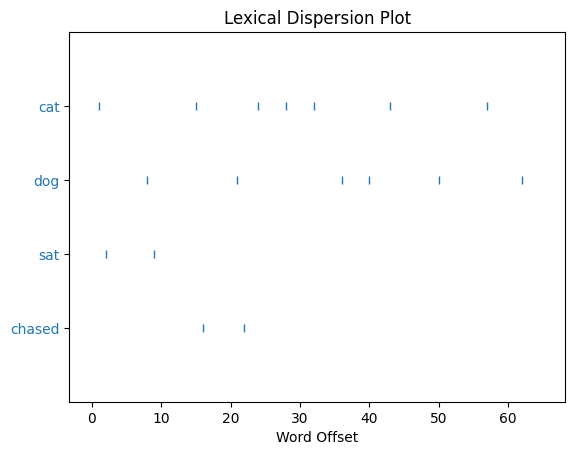

In [23]:
# Dispersion plot (requires matplotlib)
import matplotlib.pyplot as plt

text_large.dispersion_plot(["cat", "dog", "sat", "chased"])
plt.show()

## 2.3 Loading Sample Texts

NLTK comes with many built-in corpora.

In [24]:
# Download book corpus if needed
nltk.download('gutenberg', quiet=True)
nltk.download('brown', quiet=True)

True

In [25]:
from nltk.corpus import gutenberg

# Available texts in Gutenberg corpus
print("Available Gutenberg texts:")
print(gutenberg.fileids())

Available Gutenberg texts:
['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [26]:
# Load a specific text
emma_text = gutenberg.raw('austen-emma.txt')
print(f"Emma by Jane Austen")
print(f"Total characters: {len(emma_text):,}")
print(f"\nFirst 500 characters:")
print(emma_text[:500])

Emma by Jane Austen
Total characters: 887,071

First 500 characters:
[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died t


In [27]:
# Get words and sentences
emma_words = gutenberg.words('austen-emma.txt')
emma_sents = gutenberg.sents('austen-emma.txt')

print(f"Total words: {len(emma_words):,}")
print(f"Total sentences: {len(emma_sents):,}")
print(f"\nFirst 20 words: {list(emma_words[:20])}")
print(f"\nFirst sentence: {emma_sents[0]}")

Total words: 192,427
Total sentences: 7,752

First 20 words: ['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich']

First sentence: ['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']']


### Gutenberg Corpus Statistics

In [28]:
# Statistics for all Gutenberg texts
print(f"{'File':<35} {'Chars':>10} {'Words':>10} {'Sents':>8} {'Avg Word':>10} {'Avg Sent':>10}")
print("-" * 85)

for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    avg_word_len = num_chars / num_words
    avg_sent_len = num_words / num_sents
    
    print(f"{fileid:<35} {num_chars:>10,} {num_words:>10,} {num_sents:>8,} {avg_word_len:>10.1f} {avg_sent_len:>10.1f}")

File                                     Chars      Words    Sents   Avg Word   Avg Sent
-------------------------------------------------------------------------------------
austen-emma.txt                        887,071    192,427    7,752        4.6       24.8
austen-persuasion.txt                  466,292     98,171    3,747        4.7       26.2
austen-sense.txt                       673,022    141,576    4,999        4.8       28.3
bible-kjv.txt                        4,332,554  1,010,654   30,103        4.3       33.6
blake-poems.txt                         38,153      8,354      438        4.6       19.1
bryant-stories.txt                     249,439     55,563    2,863        4.5       19.4
burgess-busterbrown.txt                 84,663     18,963    1,054        4.5       18.0
carroll-alice.txt                      144,395     34,110    1,703        4.2       20.0
chesterton-ball.txt                    457,450     96,996    4,779        4.7       20.3
chesterton-brown.txt    

### Brown Corpus (Categorized)

In [29]:
from nltk.corpus import brown

# Brown corpus categories
print("Brown corpus categories:")
print(brown.categories())

Brown corpus categories:
['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [30]:
# Get words from a specific category
news_words = brown.words(categories='news')
print(f"News category: {len(news_words):,} words")
print(f"First 20 words: {list(news_words[:20])}")

News category: 100,554 words
First 20 words: ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that']


## 2.4 Text Statistics

In [31]:
def text_statistics(text):
    """Calculate comprehensive text statistics"""
    tokens = word_tokenize(text)
    sentences = sent_tokenize(text)
    
    # Basic counts
    char_count = len(text)
    word_count = len(tokens)
    sent_count = len(sentences)
    unique_words = len(set(t.lower() for t in tokens if t.isalpha()))
    
    # Averages
    avg_word_len = sum(len(w) for w in tokens if w.isalpha()) / len([w for w in tokens if w.isalpha()])
    avg_sent_len = word_count / sent_count
    
    # Lexical diversity
    alpha_tokens = [t.lower() for t in tokens if t.isalpha()]
    lexical_diversity = len(set(alpha_tokens)) / len(alpha_tokens)
    
    return {
        'characters': char_count,
        'words': word_count,
        'sentences': sent_count,
        'unique_words': unique_words,
        'avg_word_length': avg_word_len,
        'avg_sentence_length': avg_sent_len,
        'lexical_diversity': lexical_diversity
    }

In [32]:
sample = """Natural Language Processing (NLP) is a field of artificial intelligence.
It enables computers to understand, interpret, and generate human language.
NLP combines computational linguistics with machine learning.
Applications include translation, sentiment analysis, and chatbots.
Modern NLP uses deep learning for better results."""

stats = text_statistics(sample)

print("Text Statistics")
print("=" * 40)
for key, value in stats.items():
    if isinstance(value, float):
        print(f"{key.replace('_', ' ').title():<25} {value:.2f}")
    else:
        print(f"{key.replace('_', ' ').title():<25} {value:,}")

Text Statistics
Characters                328
Words                     53
Sentences                 5
Unique Words              37
Avg Word Length           6.57
Avg Sentence Length       10.60
Lexical Diversity         0.88


### Lexical Diversity Comparison

In [33]:
def lexical_diversity(text):
    """Calculate lexical diversity (unique words / total words)"""
    tokens = [t.lower() for t in word_tokenize(text) if t.isalpha()]
    return len(set(tokens)) / len(tokens)

# Compare texts
texts = {
    'News': ' '.join(brown.words(categories='news')[:1000]),
    'Romance': ' '.join(brown.words(categories='romance')[:1000]),
    'Science Fiction': ' '.join(brown.words(categories='science_fiction')[:1000]),
}

print("Lexical Diversity by Genre (first 1000 words)")
print("-" * 40)
for genre, text in texts.items():
    div = lexical_diversity(text)
    print(f"{genre:<20} {div:.2%}")

Lexical Diversity by Genre (first 1000 words)
----------------------------------------
News                 44.71%
Romance              43.22%
Science Fiction      45.91%


## Summary

| Method | Description |
|--------|-------------|
| `Text(tokens)` | Create NLTK Text object |
| `.concordance(word)` | Show word in context |
| `.similar(word)` | Find words in similar contexts |
| `.common_contexts([w1, w2])` | Find shared contexts |
| `.dispersion_plot(words)` | Visualize word positions |
| `.vocab()` | Get frequency distribution |
| `.count(word)` | Count word occurrences |

### Built-in Corpora
- `gutenberg` - Classic literature
- `brown` - Categorized text (news, romance, etc.)
- `reuters` - News articles
- `movie_reviews` - Movie reviews (positive/negative)